In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import os


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
os.getcwd()

'C:\\Users\\Daniel Beck\\Documents\\University\\AAA_ESADE\\CloudComputing\\PandasNotebooks\\PandasSession1'

In [3]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', header=None, names=rnames,  engine='python')
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('ml-1m/movies.dat', sep='::', header=None, names=mnames,  engine='python')
data = pd.merge(pd.merge(ratings, users), movies)

In [ ]:
# explore the dataset
df = data
df.head()

In [ ]:
df.duplicated().sum()
df.shape

In [24]:
# How are the categories looking?
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [52]:
list = [print([col, set(df[col])]) for col in df if len(set(df[col])) < 50]

['rating', {1, 2, 3, 4, 5}]
['gender', {'F', 'M'}]
['age', {1, 35, 45, 50, 18, 56, 25}]
['occupation', {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}]


In [55]:
# How many movies are there?

movienr = len(set(df["title"]))
print(f'There are {movienr} unique movies')

there are 3706 unique movies


In [ ]:
# How many duplicated rows are there?
duplicates = df.duplicated().sum()
print(f'There are {duplicates} duplicates')

In [61]:
#How many rows are there?
rows = df.shape[0]
print(f'There are {rows} rows, hence entries')

there are 1000209 rows, hence entries


In [66]:
# How many ratings did each movie receive on average?
avgratingnr = rows/movienr
print(f'each movie on average received {avgratingnr:.3f} number of ratings')

each movie on average received 269.889 number of ratings


In [72]:
# What is the average rating for each movie?
avgrating = pd.DataFrame(df.pivot_table("rating", "title", aggfunc="mean").to_records()).sort_values("rating", ascending=False)
avgrating.head()

,title,rating
3477,Ulysses (Ulisse) (1954),5.0
2025,Lured (1947),5.0
1203,Follow the Bitch (1998),5.0
407,Bittersweet Motel (2000),5.0
3087,Song of Freedom (1936),5.0


In [139]:
# Filter the movies to the ones that received more than 300 ratings
more300 = df.groupby("title").filter(lambda x: len(x)>=250)
more300

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [140]:
# what is the average rating for men and women 
df2 = pd.DataFrame(more300)

men_women = df2.pivot_table("rating", "title", columns= "gender", aggfunc="mean")
men_women.head()

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [141]:
gender_diff = df2.pivot_table("rating", columns="gender", aggfunc="mean")
gender_diff

diff= abs(gender_diff["F"]-gender_diff["M"])
diff

rating    0.035173
dtype: float64

In [142]:
from scipy.stats import ttest_ind

M = men_women["M"].values
F = men_women["F"].values

ttest_ind(F,M)

Ttest_indResult(statistic=0.3617580208367502, pvalue=0.7175643178705814)

In [144]:
#remove duplicates 
df = df[-df.duplicated()]
df.drop_duplicates()

In [276]:
#expand the genres into subsets
subgenres = df["genres"].str.split("|", expand=True)
subgenres.head()

,0,1,2,3,4,5
0,Drama,None,None,None,None,None
1,Drama,None,None,None,None,None
2,Drama,None,None,None,None,None
3,Drama,None,None,None,None,None
4,Drama,None,None,None,None,None


In [294]:
dftest = pd.concat([df, subgenres], axis=1)
dftest.columns = [*df.columns, "genre", "sub1", "sub2", "sub3", "sub4", "sub5"]
dftest.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year,genre,sub1,sub2,sub3,sub4,sub5
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama,None,None,None,None,None
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama,None,None,None,None,None
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama,None,None,None,None,None
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama,None,None,None,None,None
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama,None,None,None,None,None


In [180]:
# year with the most sci-fi films
df.head()

#step 1: get a column with years to group on
df["year"] = df["title"].str[-6:].str[1:5]
df.head()

#filter df by sci-fi films
scifi = df[df["genres"].str.match("Sci-Fi")]
scifi.head()


scificount = pd.DataFrame(scifi.pivot_table("movie_id", "year", aggfunc="count").to_records())
scificount.columns = ["year", "scifi_movies"]
moviecount = df.pivot_table("movie_id", "year", aggfunc="count")
scifipcnt = pd.merge(left=scificount, right=moviecount, on="year", how="outer")
scifipcnt["%"] = (scifipcnt["scifi_movies"]/scifipcnt["movie_id"])*100
scifipcnt

,year,scifi_movies,movie_id,%
0,1926,388.0,472,82.203390
1,1950,117.0,2590,4.517375
2,1951,135.0,3869,3.489274
3,1953,95.0,3172,2.994956
4,1954,290.0,4657,6.227185
5,1955,53.0,3511,1.509541
6,1956,542.0,2865,18.917976
7,1957,66.0,3352,1.968974
8,1963,1367.0,6288,21.739822
9,1965,64.0,3649,1.753905


In [181]:
scifipcnt.sort_values("%", ascending=False)

,year,scifi_movies,movie_id,%
0,1926,388.0,472,82.203390
8,1963,1367.0,6288,21.739822
11,1971,1453.0,7529,19.298712
6,1956,542.0,2865,18.917976
4,1954,290.0,4657,6.227185
12,1973,422.0,8617,4.897296
1,1950,117.0,2590,4.517375
16,1985,913.0,24794,3.682343
13,1975,300.0,8402,3.570578
25,2000,1451.0,41000,3.539024


In [247]:
df.head()

test = df[df["genres"].str.match("Sci-Fi")]
test = pd.DataFrame(pd.DataFrame(test.groupby('year')['title'].nunique()).to_records())
test.columns = ["year", "scifi_films"]
test2 = pd.DataFrame(pd.DataFrame(df.groupby("year")["title"].nunique()).to_records())
test2.columns = ["year", "all_films"]

test3 = pd.merge(left=test, right=test2, on="year", how="outer")
test3["%"] = (test3["scifi_films"]/test3["all_films"])*100
test3.head()

mostscifi = test3.sort_values("scifi_films", ascending=False)
mostpcnt = test3.sort_values("%", ascending=False)

print(mostscifi.head())
print(mostpcnt.head())

    year  scifi_films  all_films          %
6   1956          5.0         19  26.315789
22  1997          4.0        304   1.315789
20  1995          3.0        312   0.961538
1   1950          3.0         12  25.000000
25  2000          2.0        152   1.315789
   year  scifi_films  all_films          %
6  1956          5.0         19  26.315789
1  1950          3.0         12  25.000000
0  1926          1.0          6  16.666667
3  1953          2.0         14  14.285714
4  1954          2.0         15  13.333333


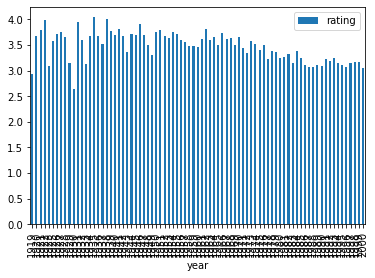

In [270]:
# plot the average ratings of films for each year
df.head()
avgrating = df.pivot_table("rating", "title", aggfunc="mean")
avgrating = pd.DataFrame(avgrating.to_records())
avgrating["year"] = avgrating["title"].str[-6:].str[1:5]
avgrating = avgrating.groupby("year").mean().sort_values("year", ascending=True)
avgrating.plot(kind="bar")